In [312]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd # type: ignore

# Load dataset
df = pd.read_csv('cleaned dataset.csv', index_col='datetime') # date time will be the identifier of the data points
df

,main.temp,main.pressure,main.humidity,clouds.all,wind.speed,weather.Clear,weather.Clouds,weather.Rain
datetime,,,,,,,,
2023-11-06 15:45:57,33.36,1010.0,68.0,20.0,4.02,0.0,1.0,0.0
2023-11-06 15:47:35,30.00,1009.0,74.0,81.0,2.06,0.0,1.0,0.0
2023-11-06 15:38:29,33.32,1010.0,66.0,20.0,2.57,0.0,1.0,0.0
2023-11-06 15:39:56,33.33,1010.0,66.0,50.0,0.89,0.0,1.0,0.0
2023-11-06 18:01:20,31.10,1010.0,72.0,20.0,4.12,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
2023-11-23 21:05:10,26.94,1012.0,88.0,99.0,2.50,0.0,0.0,1.0
2023-11-24 00:01:24,27.12,1012.0,91.0,75.0,1.54,0.0,1.0,0.0
2023-11-24 00:03:06,26.03,1011.0,82.0,55.0,1.90,0.0,1.0,0.0


In [313]:
# Separate features (except temperature) into weather_x
camanava_x = df.drop(columns=['main.temp']) # Inputs

# Separate temperature column into weather_y
camanava_y = df[['main.temp']] # Target feature

# Display the shapes of the new DataFrames
print("Shape of camanava_x:", camanava_x.shape)
print("Shape of camanava_y:", camanava_y.shape)


Shape of camanava_x: (420, 7)
Shape of camanava_y: (420, 1)


# Multiple Linear Regression

In [314]:
"""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(camanava_x, camanava_y, test_size=0.2, random_state=42)

# X columns = main.pressure  main.humidity  clouds.all  wind.speed weather.Clear  weather.Clouds  weather.Rain  
# Y columns = main.temp
"""


'\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_squared_error\n\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(camanava_x, camanava_y, test_size=0.2, random_state=42)\n\n# X columns = main.pressure  main.humidity  clouds.all  wind.speed weather.Clear  weather.Clouds  weather.Rain  \n# Y columns = main.temp\n'

In [315]:
# Splitting based on temporal data 
import matplotlib.pyplot as plt # type: ignore
from sklearn.linear_model import LinearRegression # type: ignore
from sklearn.metrics import mean_squared_error # type: ignore
import pandas as pd # type: ignore
import seaborn as sns # type: ignore

datasplit = int(len(camanava_x) * 0.8)

# Split the features
X_train = camanava_x[:datasplit]
X_test = camanava_x[datasplit:]

# Split the target variable
y_train = camanava_y[:datasplit]
y_test = camanava_y[datasplit:]

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (336, 7)
Shape of X_test: (84, 7)
Shape of y_train: (336, 1)
Shape of y_test: (84, 1)


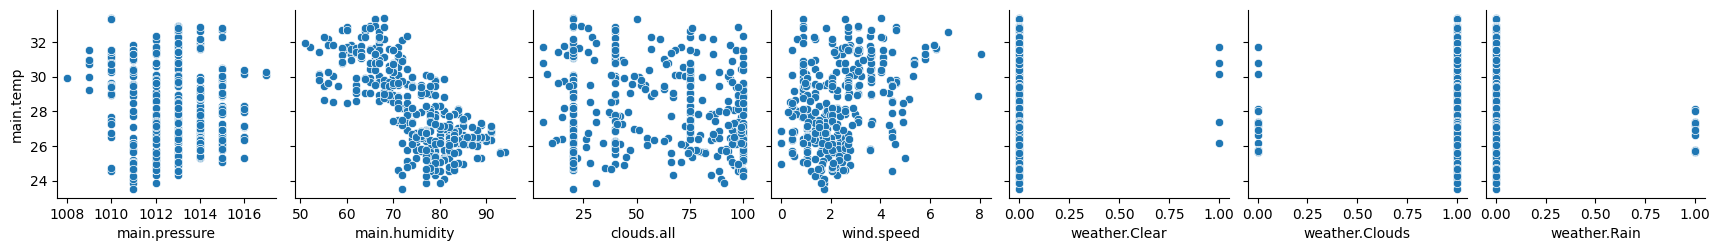

In [316]:

data = pd.concat([camanava_x, camanava_y], axis=1)

# Create pair plot
sns.pairplot(data, y_vars=['main.temp'], x_vars=camanava_x.columns)
plt.show()


In [317]:
# Initialize and train the Linear Regression model
model = LinearRegression() # Adjusts automatically to multiple linear regression if X has multiple features
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
y_pred.shape

(84, 1)

In [318]:
#  Actual and Predicted values along with their differences
results1 = pd.DataFrame({
    'Actual': y_test.values.flatten(), 
    'Predicted': y_pred.flatten(), 
    'Difference': (y_test.values - y_pred).flatten()
    })
print("Actual vs Predicted:")
results1.index = X_test.index  
results1


Actual vs Predicted:


,Actual,Predicted,Difference
datetime,,,
2023-11-21 12:01:04,30.35,29.160941,1.189059
2023-11-21 12:02:41,30.27,31.525970,-1.255970
2023-11-21 12:03:02,30.29,29.309177,0.980823
2023-11-21 12:04:31,30.41,29.369833,1.040167
2023-11-21 15:01:10,30.41,29.823711,0.586289
...,...,...,...
2023-11-23 21:05:10,26.94,25.543913,1.396087
2023-11-24 00:01:24,27.12,25.009741,2.110259
2023-11-24 00:03:06,26.03,26.841854,-0.811854


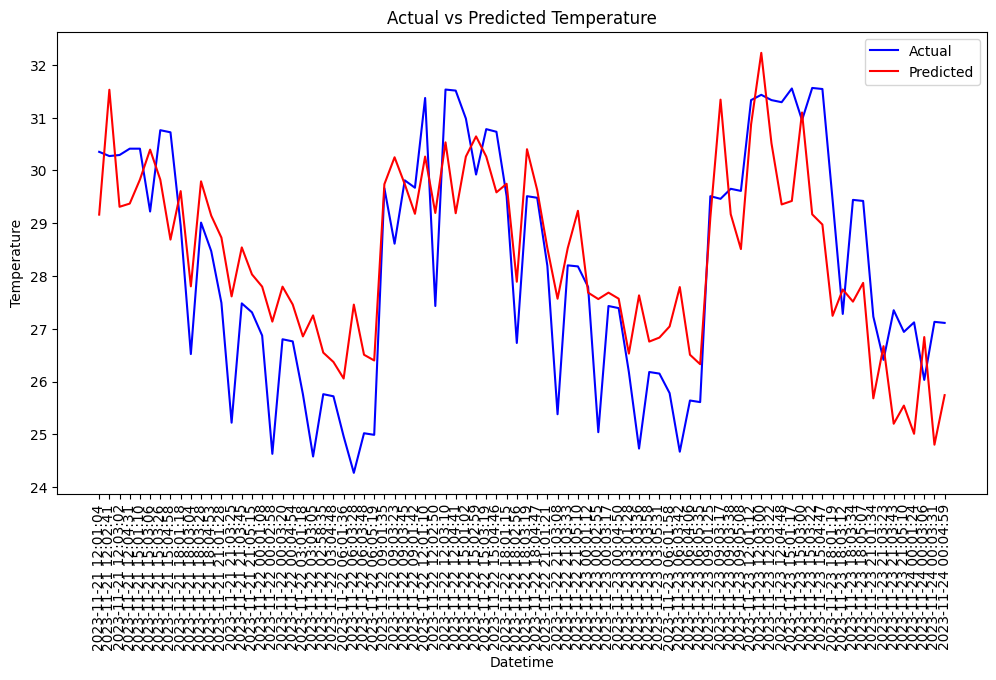

In [319]:

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(results1.index, results1['Actual'], color='blue', label='Actual')
plt.plot(results1.index, results1['Predicted'], color='red', label='Predicted')


plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature')
plt.legend()

# Show the plot
plt.show()


In [320]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 2.026288823672974


Comparing to other regression Model

In [321]:
from sklearn.tree import DecisionTreeRegressor # type: ignore
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)
y_pred3=regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred3)
print("Decision Tree Regression - Mean Squared Error:", mse)

Decision Tree Regression - Mean Squared Error: 4.313493154761905


In [322]:
from sklearn.ensemble import RandomForestRegressor # type: ignore
random_forest_regressor = RandomForestRegressor(random_state=0)
random_forest_regressor.fit(X_train, y_train)

y_pred4 = random_forest_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred4)
print("Random Tree Regression - Mean Squared Error:", mse)

Random Tree Regression - Mean Squared Error: 1.7782247789408498


# Simple Linear 
Temperature vs Humidity for example

In [323]:
# Separate features (except temperature) into weather_x
camanava_X= df [['main.humidity']]

# Separate temperature column into weather_y
camanava_Y = df[['main.temp']]

# Display the shapes of the new DataFrames
print("Shape of camanava_x:", camanava_X.shape)
print("Shape of camanava_y:", camanava_Y.shape)
#camanava_y.head()

Shape of camanava_x: (420, 1)
Shape of camanava_y: (420, 1)


In [324]:
from sklearn.model_selection import train_test_split # type: ignore
# Split the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(camanava_X,  camanava_Y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(Xtrain, ytrain)

# Make predictions on the testing set
ypred = model.predict(Xtest)

In [325]:
#  Actual and Predicted values along with their differences
results1 = pd.DataFrame({
    'Actual': ytest.values.flatten(), 
    'Predicted': ypred.flatten(), 
    'Difference': (ytest.values - ypred).flatten()
    })
print("Actual vs Predicted:")
results1.index = Xtest.index  
results1


Actual vs Predicted:


,Actual,Predicted,Difference
datetime,,,
2023-11-15 06:03:27,26.03,28.104813,-2.074813
2023-11-21 09:03:25,28.83,28.899045,-0.069045
2023-11-16 09:04:58,30.26,29.097603,1.162397
2023-11-22 12:02:50,27.43,29.097603,-1.667603
2023-11-24 00:01:24,27.12,24.927885,2.192115
...,...,...,...
2023-11-23 18:01:19,29.44,27.310581,2.129419
2023-11-10 00:03:19,26.66,27.112023,-0.452023
2023-11-23 18:05:07,29.42,27.906255,1.513745


In [326]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(ytest, ypred)

print("Mean Squared Error:", mse)

Mean Squared Error: 2.396831750128784


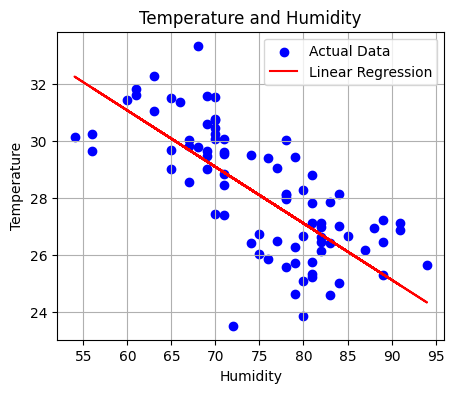

In [327]:
plt.figure(figsize=(5,4))
plt.scatter(Xtest, ytest, color='blue', label='Actual Data')
plt.plot(Xtest, ypred, color='red', label='Linear Regression')
plt.title("Temperature and Humidity")
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()